In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [3]:
us_temperatures=pd.read_csv('datasets/US-Temperatures-CSV.csv',delimiter=',')
us_temperatures_df = pd.DataFrame(us_temperatures)
us_temperatures_df.columns = us_temperatures_df.iloc[0]
us_temperatures_df = us_temperatures_df[1:]
#us_temperatures_df.to_csv('datasets/US-Temperatures-CSV2.csv', index=False) 
us_temperatures_df.head()
#us_temperatures_df.shape[1]

,Year,Annual_Mean,Lowess(5)
1,1880,-0.31,-0.07
2,1881,0.16,-0.16
3,1882,0.11,-0.25
4,1883,-0.75,-0.32
5,1884,-0.52,-0.4


In [4]:
us_temperatures_df['Year'] = pd.to_numeric(us_temperatures_df['Year'])
us_temperatures_df['Annual_Mean'] = pd.to_numeric(us_temperatures_df['Annual_Mean'])
#Annual_Mean_C = []
#Annual_Mean_C.append

In [5]:
temp_cTo_F = [(x*9/5)+ 32 for x in us_temperatures_df['Annual_Mean']]
#(0°C × 9/5) + 32 = 32°F
#(-0.31°C × 9/5) + 32 = 31.442°F
#temp_cTo_F

In [6]:
us_temperatures_df["Annual_Mean"] = temp_cTo_F
us_temperatures_df.tail()

,Year,Annual_Mean,Lowess(5)
134,2013,32.450,0.8
135,2014,32.594,0.97
136,2015,34.448,1.14
137,2016,34.988,1.33
138,2017,34.538,1.53


In [7]:
#U.S. surface temp increased by 3.16°F (past 25 yrs)
change = us_temperatures_df.iloc[137]['Annual_Mean'] #2017
#change
change2 = us_temperatures_df.iloc[113]['Annual_Mean'] #1993 - 25 years-ish
#change2
change3 = change-change2
change3

3.1679999999999957

In [9]:
us_temp_decade = us_temperatures_df.groupby((us_temperatures_df.Year//10)*10).mean()
us_temp_decade.head()

,Year,Annual_Mean
Year,,
1880,1884.5,31.4744
1890,1894.5,31.5608
1900,1904.5,31.7732
1910,1914.5,31.5788
1920,1924.5,32.0252


In [10]:
us_crop_yield=pd.read_csv('datasets/Production_Crops_E_Americas.csv',delimiter=',')
us_crop_yield_df = pd.DataFrame(us_crop_yield)
us_crop_yield_df.head()
#us_crop_yield_df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,1961,1961.1,1962,...,2010,2010.1,2011,Area Code.1,Area.1,Item Code.1,Item.1,Element Code.1,Element.1,Unit.1
0,8,Antigua and Barbuda,486,Bananas,5312,Area harvested,ha,NaN,NaN,NaN,...,25.0,F,28.0,Im,35.0,F,33.0,Im,30.0,Im
1,8,Antigua and Barbuda,486,Bananas,5419,Yield,hg/ha,NaN,NaN,NaN,...,88463.0,Fc,84741.0,Fc,71429.0,Fc,76630.0,Fc,87661.0,Fc
2,8,Antigua and Barbuda,486,Bananas,5510,Production,tonnes,NaN,NaN,NaN,...,221.0,Im,240.0,Im,250.0,F,255.0,Im,262.0,Im
3,8,Antigua and Barbuda,414,"Beans, green",5312,Area harvested,ha,1.0,F,1.0,...,22.0,Im,24.0,Im,25.0,F,25.0,Im,26.0,Im
4,8,Antigua and Barbuda,414,"Beans, green",5419,Yield,hg/ha,40000.0,Fc,40000.0,...,39063.0,Fc,39237.0,Fc,40000.0,Fc,39469.0,Fc,38202.0,Fc


In [11]:
us_crop_area = us_crop_yield_df[us_crop_yield_df["Area"]=="United States of America"]
us_crop_area_element = us_crop_area[us_crop_area["Element"]=="Yield"]

us_crop_area_element = us_crop_area_element.drop('Area', 1)
us_crop_area_element = us_crop_area_element.drop('Area Code', 1)
us_crop_area_element = us_crop_area_element.drop('Item Code', 1)
us_crop_area_element = us_crop_area_element.drop('Element Code', 1)
us_crop_area_element = us_crop_area_element.drop('Element', 1)
us_crop_area_element = us_crop_area_element.drop('Unit', 1)
us_crop_area_element = us_crop_area_element.drop('Area Code.1', 1)
us_crop_area_element = us_crop_area_element.drop('Area.1', 1)
us_crop_area_element = us_crop_area_element.drop('Item Code.1', 1)
us_crop_area_element = us_crop_area_element.drop('Item.1', 1)
us_crop_area_element = us_crop_area_element.drop('Element Code.1', 1)
us_crop_area_element = us_crop_area_element.drop('Element.1', 1)
us_crop_area_element = us_crop_area_element.drop('Unit.1', 1)
us_crop_area_element = us_crop_area_element.drop('1961.1', 1)
us_crop_area_element = us_crop_area_element.drop('1962.1', 1)
us_crop_area_element = us_crop_area_element.drop('1963.1', 1)
us_crop_area_element = us_crop_area_element.drop('1964.1', 1)
us_crop_area_element = us_crop_area_element.drop('1965.1', 1)
us_crop_area_element = us_crop_area_element.drop('1966.1', 1)
us_crop_area_element = us_crop_area_element.drop('1967.1', 1)
us_crop_area_element = us_crop_area_element.drop('1968.1', 1)
us_crop_area_element = us_crop_area_element.drop('1969.1', 1)
us_crop_area_element = us_crop_area_element.drop('1970.1', 1)
us_crop_area_element = us_crop_area_element.drop('1971.1', 1)
us_crop_area_element = us_crop_area_element.drop('1972.1', 1)
us_crop_area_element = us_crop_area_element.drop('1973.1', 1)
us_crop_area_element = us_crop_area_element.drop('1974.1', 1)
us_crop_area_element = us_crop_area_element.drop('1975.1', 1)
us_crop_area_element = us_crop_area_element.drop('1976.1', 1)
us_crop_area_element = us_crop_area_element.drop('1977.1', 1)
us_crop_area_element = us_crop_area_element.drop('1978.1', 1)
us_crop_area_element = us_crop_area_element.drop('1979.1', 1)
us_crop_area_element = us_crop_area_element.drop('1980.1', 1)
us_crop_area_element = us_crop_area_element.drop('1981.1', 1)
us_crop_area_element = us_crop_area_element.drop('1982.1', 1)
us_crop_area_element = us_crop_area_element.drop('1983.1', 1)
us_crop_area_element = us_crop_area_element.drop('1984.1', 1)
us_crop_area_element = us_crop_area_element.drop('1985.1', 1)
us_crop_area_element = us_crop_area_element.drop('1986.1', 1)
us_crop_area_element = us_crop_area_element.drop('1987.1', 1)
us_crop_area_element = us_crop_area_element.drop('1988.1', 1)
us_crop_area_element = us_crop_area_element.drop('1989.1', 1)
us_crop_area_element = us_crop_area_element.drop('1990.1', 1)
us_crop_area_element = us_crop_area_element.drop('1991.1', 1)
us_crop_area_element = us_crop_area_element.drop('1992.1', 1)
us_crop_area_element = us_crop_area_element.drop('1993.1', 1)
us_crop_area_element = us_crop_area_element.drop('1994.1', 1)
us_crop_area_element = us_crop_area_element.drop('1995.1', 1)
us_crop_area_element = us_crop_area_element.drop('1996.1', 1)
us_crop_area_element = us_crop_area_element.drop('1997.1', 1)
us_crop_area_element = us_crop_area_element.drop('1998.1', 1)
us_crop_area_element = us_crop_area_element.drop('1999.1', 1)
us_crop_area_element = us_crop_area_element.drop('2000.1', 1)
us_crop_area_element = us_crop_area_element.drop('2001.1', 1)
us_crop_area_element = us_crop_area_element.drop('2002.1', 1)
us_crop_area_element = us_crop_area_element.drop('2003.1', 1)
us_crop_area_element = us_crop_area_element.drop('2004.1', 1)
us_crop_area_element = us_crop_area_element.drop('2005.1', 1)
us_crop_area_element = us_crop_area_element.drop('2006.1', 1)
us_crop_area_element = us_crop_area_element.drop('2007.1', 1)
us_crop_area_element = us_crop_area_element.drop('2008.1', 1)
us_crop_area_element = us_crop_area_element.drop('2009.1', 1)
us_crop_area_element = us_crop_area_element.drop('2010.1', 1)

us_crop_area_element.head()


,Item,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
7407,"Almonds, with shell",16669.0,11558.0,13684.0,16517.0,13932.0,16126.0,13781.0,12362.0,18355.0,...,36275.0,35325.0,34074.0,29969.0,36049.0,46830.0,51238.0,39887.0,45371.0,56883.0
7410,Apples,139842.0,141510.0,143045.0,156929.0,158906.0,153463.0,147490.0,151143.0,189960.0,...,242001.0,249833.0,303595.0,287032.0,299063.0,290340.0,307980.0,312758.0,304560.0,319541.0
7413,Apricots,107146.0,96730.0,115581.0,124560.0,132615.0,115638.0,89640.0,91689.0,140788.0,...,116356.0,122633.0,130705.0,115554.0,64446.0,156417.0,146953.0,124698.0,122471.0,122969.0
7416,Artichokes,67247.0,61656.0,67260.0,72914.0,78461.0,84120.0,85230.0,67251.0,72917.0,...,128825.0,157113.0,123092.0,123188.0,96761.0,123136.0,145758.0,140115.0,134674.0,151299.0
7419,Asparagus,28027.0,28572.0,29000.0,27284.0,28015.0,29038.0,27132.0,29573.0,27353.0,...,31723.0,35616.0,37581.0,34876.0,29914.0,38416.0,33139.0,34501.0,31986.0,34488.0


In [12]:
x = list(us_crop_area_element.columns.values)

#colnames.pop(0)
mergedlist = x

#mergedlist.remove("Area")
mergedlist.remove("Item")


mergedlist

['1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011']

In [13]:
colnames = pd.Series(mergedlist)
df_yield = pd.DataFrame(columns=['Year'])
df_yield['Year'] = colnames.values
#df_ny_strawberry['Yield'] = colnames.values
df_yield.head()

,Year
0,1961
1,1962
2,1963
3,1964
4,1965


In [14]:
yield_transform = us_crop_area_element.set_index('Item').T
#yield_transform = yield_transform.rename(columns={'    New York Yield':'New_York_Yield'})
yield_transform.head()
#yield_79 = []
#yield_79= list(sdf["New_York_Yield"])
#yield_79

Item,"Almonds, with shell",Apples,Apricots,Artichokes,Asparagus,Avocados,Bananas,Barley,"Beans, dry","Beans, green",...,"Coarse Grain, Total",Fibre Crops Primary,"Fruit excl Melons,Total",Oilcakes Equivalent,Oilcrops Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary,"Vegetables&Melons, Total"
1961,16669.0,139842.0,107146.0,67247.0,28027.0,48990.0,105447.0,16489.0,15413.0,48340.0,...,29421.0,4915.0,152837.0,9514.0,2472.0,14050.0,207287.0,24272.0,130228.0,130228.0
1962,11558.0,141510.0,96730.0,61656.0,28572.0,44532.0,97139.0,18839.0,14049.0,49198.0,...,30766.0,5124.0,159982.0,9409.0,2489.0,13832.0,203932.0,15335.0,139221.0,139221.0
1963,13684.0,143045.0,115581.0,67260.0,29000.0,50850.0,91981.0,18808.0,16153.0,48797.0,...,32427.0,5790.0,148465.0,9758.0,2585.0,15569.0,214229.0,29861.0,136510.0,136510.0
1964,16517.0,156929.0,124560.0,72914.0,27284.0,31137.0,114667.0,20209.0,13886.0,40138.0,...,30565.0,5797.0,150694.0,9423.0,2480.0,14411.0,200103.0,22797.0,135754.0,135754.0
1965,13932.0,158906.0,132615.0,78461.0,28015.0,57109.0,84583.0,23071.0,12302.0,48648.0,...,36422.0,5909.0,164159.0,10404.0,2717.0,12841.0,221505.0,23741.0,140652.0,140652.0


In [15]:
#yield_transform.isnull().values.any() #boolean
#nan_rows = yield_transform[yield_transform.isnull().T.any().T]
#nan_rows
#yield_transform.isnull().any()
#yield_transform=yield_transform.dropna(axis=1,how='all')
#yield_transform.dropna(axis=1)
#yield_transform.isnull().any()
yield_transform.dropna(axis=1)
#yield_transform.isnull()
#yield_transform.head()
yield_transform.to_csv('US_Crop_Yield_By_Item.csv')

In [16]:
yield_Almonds = []
yield_Almonds= list(yield_transform["Almonds, with shell"])
yield_Apples = []
yield_Apples = list(yield_transform["Apples"])
yield_Strawberries = []
yield_Strawberries = list(yield_transform["Strawberries"])
yield_Soybeans = []
yield_Soybeans = list(yield_transform["Soybeans"])
yield_Onions = []
yield_Onions = list(yield_transform["Onions, dry"])
yield_Potatoes = []
yield_Potatoes = list(yield_transform["Potatoes"])
yield_Maize = []
yield_Maize = list(yield_transform["Maize"])

In [17]:
#colnames = pd.Series(mergedlist)
#df_ny_strawberry = pd.DataFrame(columns=['Year','Yield'])
#df_yield['Year'] = colnames.values
df_yield['Almond'] = yield_Almonds
df_yield['Apple'] = yield_Apples
df_yield['Strawberry'] = yield_Strawberries

df_yield['Soybean'] = yield_Soybeans

df_yield['Onion'] = yield_Onions

df_yield['Potato'] = yield_Potatoes
df_yield['Corn/Maize'] = yield_Maize

df_yield.head()

,Year,Almond,Apple,Strawberry,Soybean,Onion,Potato,Corn/Maize
0,1961,16669.0,139842.0,64330.0,16900.0,285642.0,222021.0,39184.0
1,1962,11558.0,141510.0,66338.0,16302.0,297420.0,220346.0,40621.0
2,1963,13684.0,143045.0,71399.0,16432.0,299316.0,229710.0,42596.0
3,1964,16517.0,156929.0,82254.0,15309.0,281997.0,212448.0,39498.0
4,1965,13932.0,158906.0,61139.0,16508.0,321229.0,235879.0,46492.0


In [18]:
df_yield['Year']=df_yield['Year'].astype(int)

In [19]:
year_yield_joindf= pd.merge(df_yield, us_temperatures_df, on='Year', how='inner')
year_yield_joindf.head()

,Year,Almond,Apple,Strawberry,Soybean,Onion,Potato,Corn/Maize,Annual_Mean,Lowess(5)
0,1961,16669.0,139842.0,64330.0,16900.0,285642.0,222021.0,39184.0,32.018,0.01
1,1962,11558.0,141510.0,66338.0,16302.0,297420.0,220346.0,40621.0,31.982,-0.02
2,1963,13684.0,143045.0,71399.0,16432.0,299316.0,229710.0,42596.0,32.342,-0.04
3,1964,16517.0,156929.0,82254.0,15309.0,281997.0,212448.0,39498.0,31.802,-0.06
4,1965,13932.0,158906.0,61139.0,16508.0,321229.0,235879.0,46492.0,31.784,-0.09


In [20]:
#U.S. surface temperature has increased at an average rate of about 0.53°F/decade since the 1990s
annual_mean_list = us_temp_decade.Annual_Mean
res = [y - x for x, y in zip(annual_mean_list[12:], annual_mean_list[13:])]
import statistics
x = statistics.mean(res)
Average_Change = (f"Average  Change: {round(x,2)}")
print(Average_Change)

Average  Change: 0.53


In [21]:
#us_temperatures_df.plot(kind="scatter", x="Year", y="Annual_Mean", figsize=(10,5),
            #  title="Annual Mean Temp Change in the US (1880-2017)",linewidth=.2)
#sns.lmplot(x="Year", y="Annual_Mean", data=us_temperatures_df,lowess=True,line_kws={'color': 'red'},height=5, aspect=1.7)

#x2 = "Year"
#x1=year_yield_joindf["Year"]
#y1= year_yield_joindf[0:2]

#year_yield_joindf.plot(x="Year", y=["Annual_Mean", "Soybean"], kind="line")

#plt.title("U.S. Temperature (1880-2017)")
#lowess = sm.nonparametric.lowess
#x=us_temperatures_df["Year"]
#y=us_temperatures_df["Annual_Mean"]
#plt.plot(x,y,linewidth=.5)
#plt.xlabel('Year')
#plt.ylabel('Yield (hg/ha)')
#plt.grid(True,linewidth=.3)
#plt.subplots_adjust(left=.2)
#axes = plt.gca()
#axes.set_ylim([-100,100])
#plt.show()
#plt.savefig('US_Climate_vs_Yields.png')
#Change names of axes
#Add a line -- A lowess smoothing line?
#Lowess: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

<IPython.core.display.Javascript object>


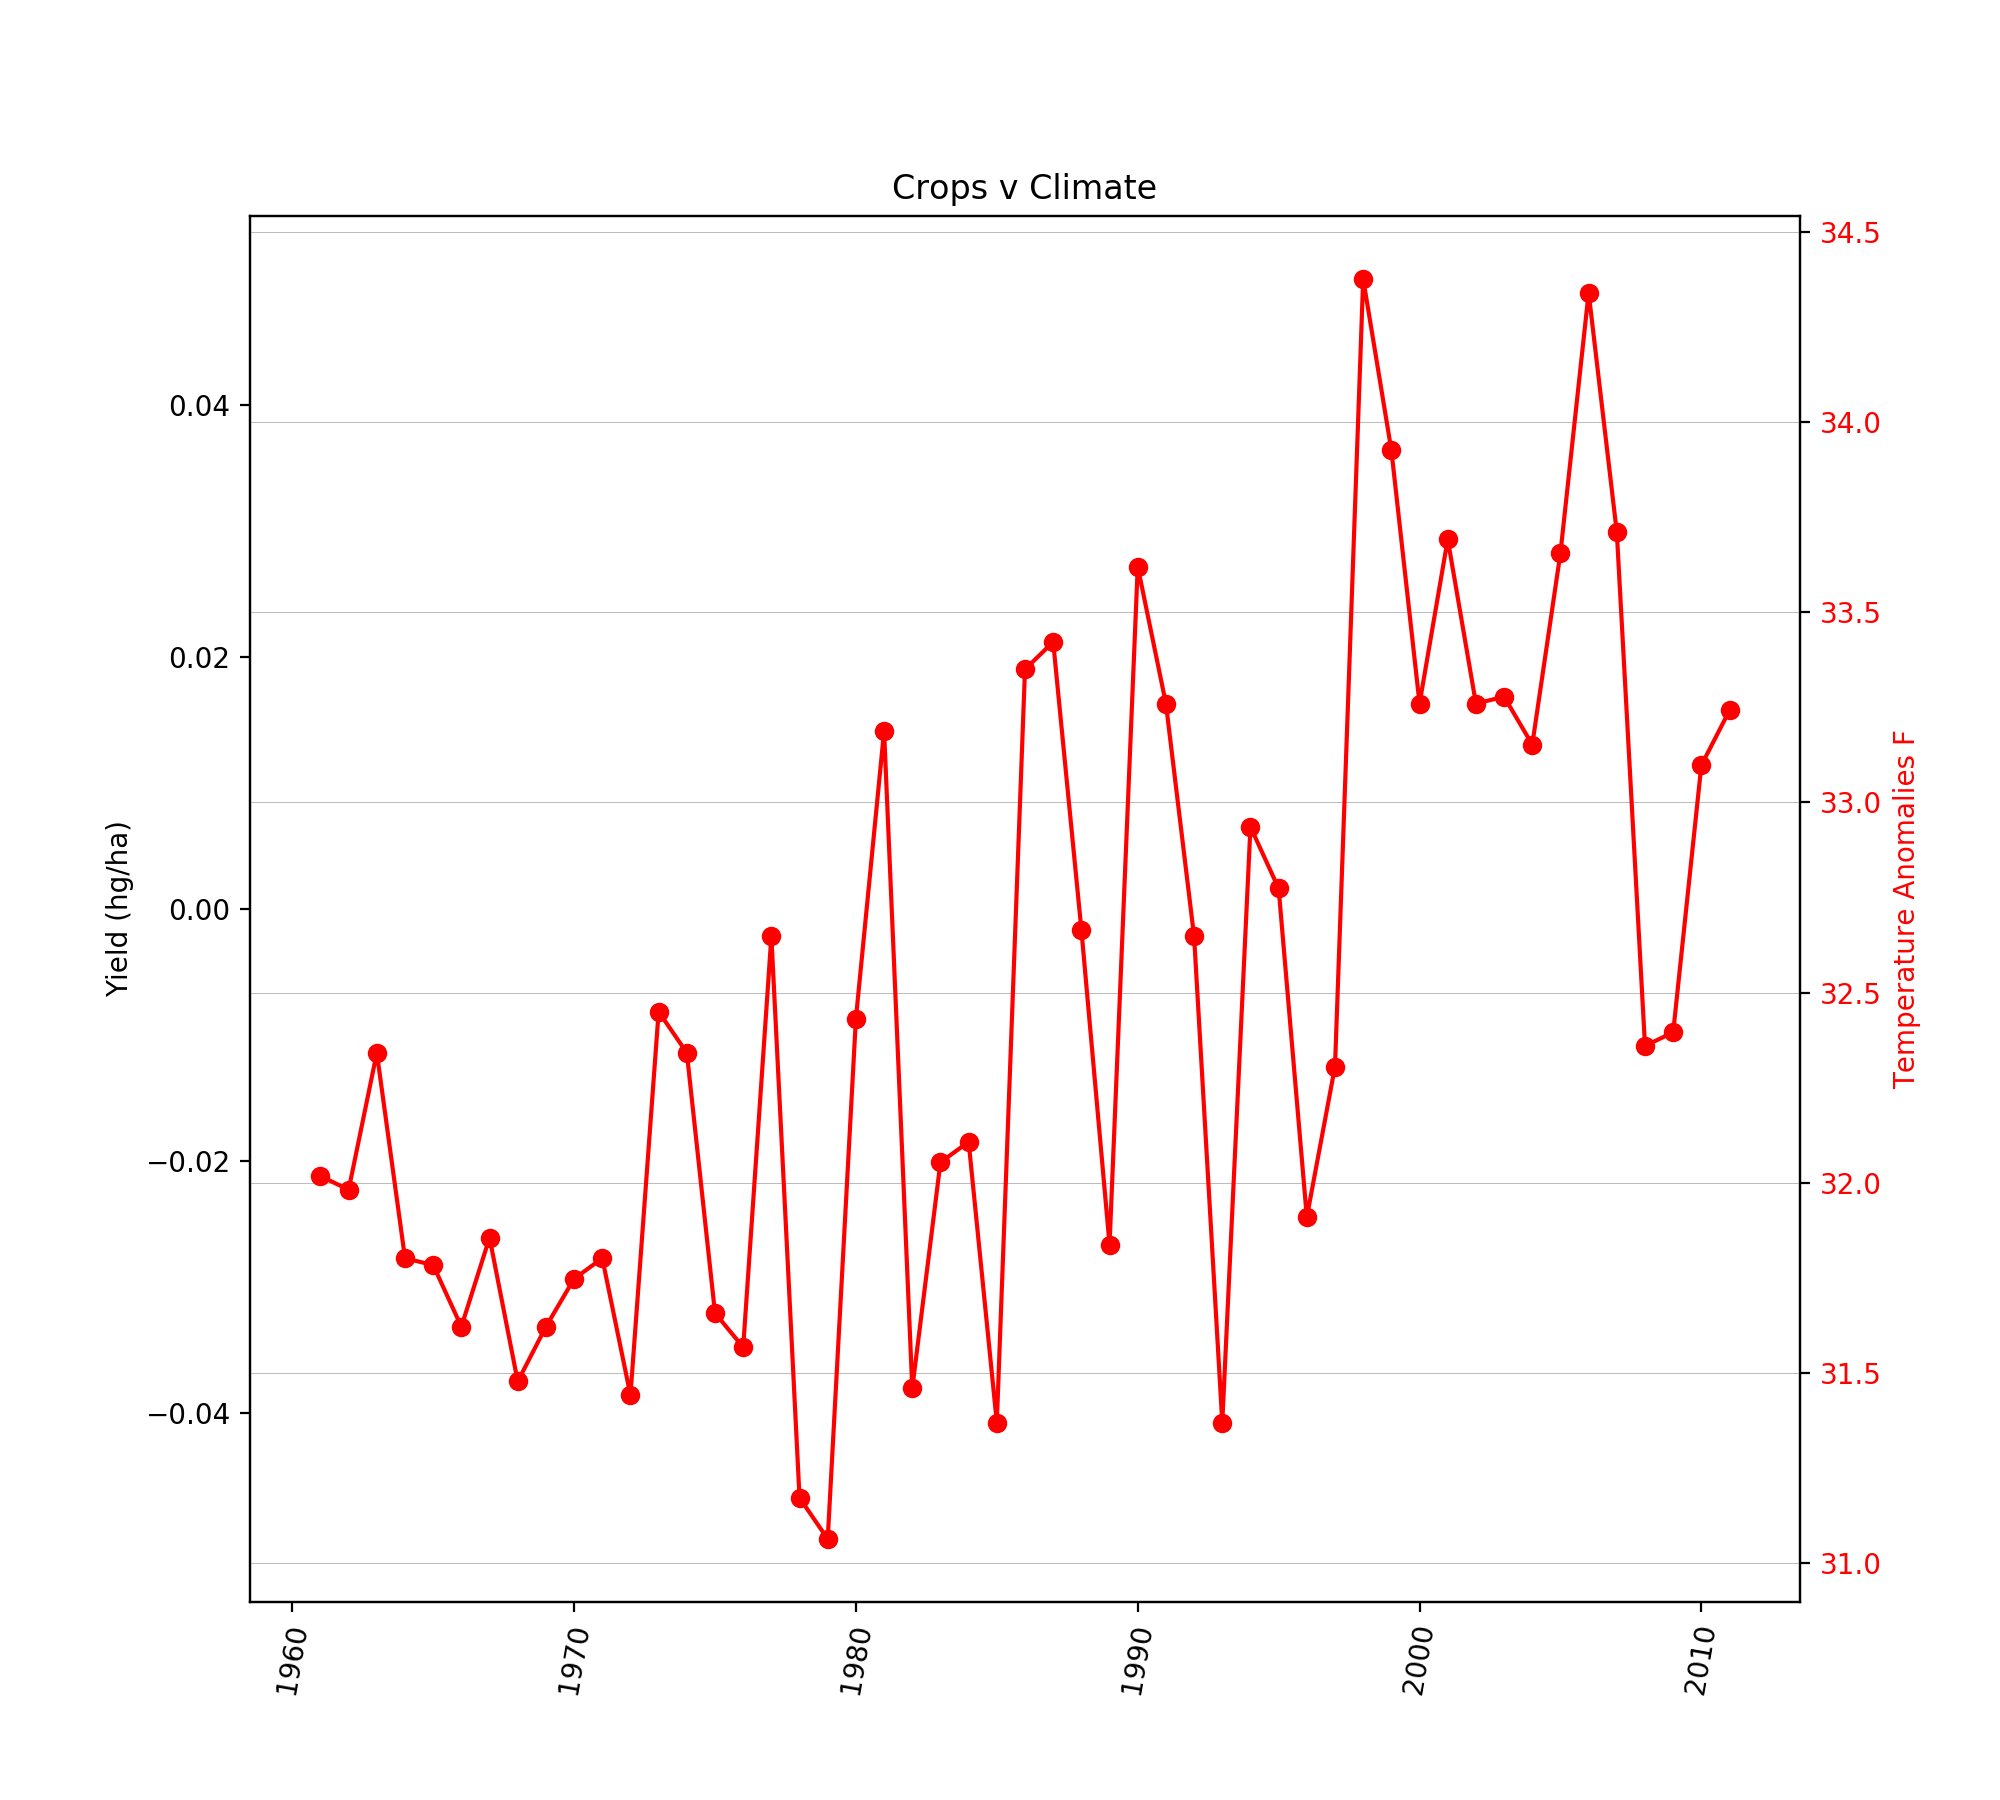

In [24]:
x2=year_yield_joindf['Year']
y1=year_yield_joindf['Soybean']
y2=year_yield_joindf['Annual_Mean']
y3=year_yield_joindf['Almond']

width = .55

fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(111)
ax1.plot(x=x2, y=["Soybean","Almond"])
ax1.set_ylabel('Yield (hg/ha)')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r',marker='o')
ax2.set_ylabel('Temperature Anomalies F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
ax1.tick_params(axis='x', rotation=80)
plt.grid(True,linewidth=.3)
plt.xlabel('Year')
plt.title('Crops v Climate')
plt.savefig('US_temp_vs_soybean.png')


In [63]:
#sns.lmplot(x="Year", y="Annual_Mean", data=us_temperatures_df,lowess=True)
#plt.ylabel('Temperature Anomaly (°F)')
#plt.title("Annual Mean Temp Change in the US (1880-2017)")
#https://seaborn.pydata.org/tutorial/regression.html
#plt.grid(True)
#plt.show()